In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"C:\Users\pulla\Downloads\customer_data.xls")

In [4]:
# Handle missing values using forward fill (ffill)
data.ffill(inplace=True)

# Alternatively, for backward fill use this:
# data.bfill(inplace=True)


In [6]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [7]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

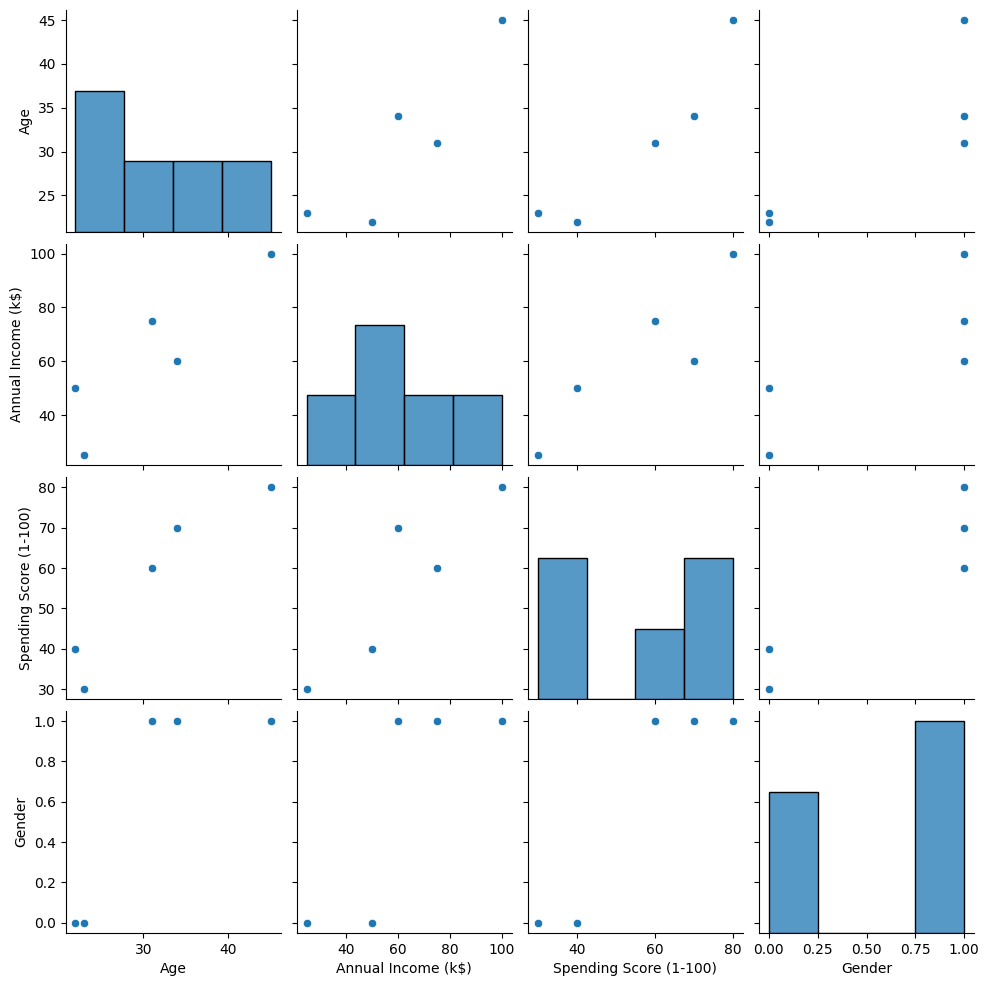

In [10]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (4,)

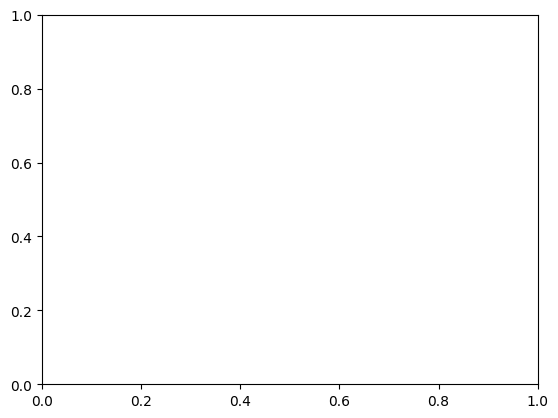

In [16]:
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_

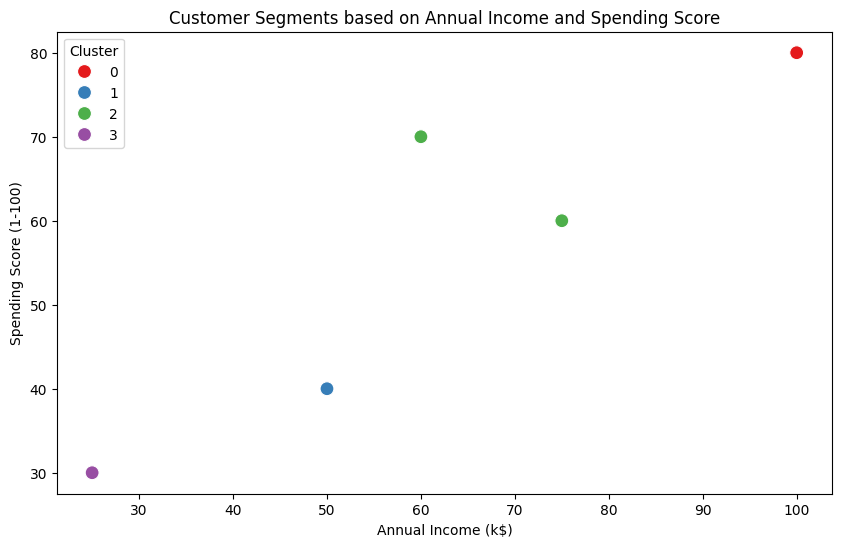

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], 
                hue=data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
